In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Load csv file
df = pd.read_csv('./A2_sales.txt', sep=' ')

NameError: name 'pd' is not defined

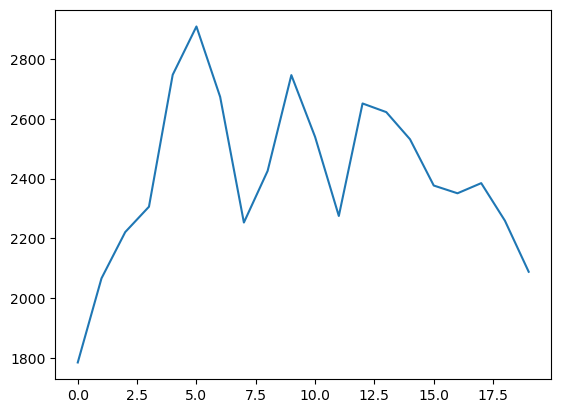

In [ ]:
t = np.arange(0, len(df), 1)
y = df['Sales']

plt.plot(t, y)

In [ ]:
mu = 2070
var = 36963
sigma = np.sqrt(var)

w = y - mu

In [ ]:
w_hat = np.zeros(len(w) + 2)
e = np.zeros(len(w) + 2)


def E_w(i):
    """
    Conditional expectation of w_i given w_t, ..., w_1
    """
    if i < 0:
        return 0
    elif i >= len(w):
        return w_hat[i]
    else:
        return w[i]


def E_e(i):
    """
    Conditional expectation of e_i given e_t, ..., e_1
    """
    if 0 <= i < len(e):
        return e[i]
    else:
        return 0


for i in range(len(w) + 2):
    # w_t = w_t-1
    w_hat[i] = (
        1.04 * E_w(i - 1)
        - 0.2 * E_w(i - 2)
        + 0.86 * E_w(i - 4)
        - 1.04 * 0.86 * E_w(i - 5)
        + 0.2 * 0.86 * E_w(i - 6)
        #+ E_e(i) as E[e_k | e_k-1, ..., e_1] = 0
        - 0.42 * E_e(i - 4)
    )
    assert E_e(i) == 0

    if i < len(w):
        e[i] = w[i] - w_hat[i]

In [2]:
plt.plot(w, label='w')
plt.plot(w_hat, label='w_hat')
plt.plot(e, label='e')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [150]:
w_hat + mu

array([2070.        , 1772.56      , 2123.04      , 2227.84      ,
       2159.4       , 2857.0336    , 2851.1024    , 2564.5504    ,
       2290.2816    , 2537.982912  , 2662.023008  , 2315.893568  ,
       2378.571072  , 2841.78242304, 2439.89286336, 2329.43129856,
       2580.04785024, 2383.02781768, 2305.53580261, 2129.5043454 ,
       2193.6632971 , 2266.55911241])

In [140]:
def arma_to_ma(ar, ma, max_deg):
    r"""
    Convert ARMA coefficients to infinite MA coefficients.
    Compute coefficients of MA model equivalent to given ARMA model.
    MA coefficients are cut off at max_deg.
    The same function as ARMAtoMA() in stats library of R
    Parameters
    ----------
    ar : array-like, shape=(n_orders,)
        The array of AR coefficients.
    ma : array-like, shape=(n_orders,)
        The array of MA coefficients.
    max_deg : int
        Coefficients are computed up to the order of max_deg.
    Returns
    -------
    np.ndarray, shape=(max_deg,)
        Equivalent MA coefficients.
    Notes
    -----
    Here is the derivation. Suppose ARMA model is defined as
    .. math::
    x_t - ar_1*x_{t-1} - ar_2*x_{t-2} - ... - ar_p*x_{t-p}\\
        = e_t + ma_1*e_{t-1} + ma_2*e_{t-2} + ... + ma_q*e_{t-q}
    namely
    .. math::
    (1 - \sum_{i=1}^p[ar_i*B^i]) x_t = (1 + \sum_{i=1}^q[ma_i*B^i]) e_t
    where :math:`B` is a backward operator.
    Equivalent MA model is
    .. math::
        x_t = (1 - \sum_{i=1}^p[ar_i*B^i])^{-1}\\
        * (1 + \sum_{i=1}^q[ma_i*B^i]) e_t\\
        = (1 + \sum_{i=1}[ema_i*B^i]) e_t
    where :math:``ema_i`` is a coefficient of equivalent MA model.
    The :math:``ema_i`` satisfies
    .. math::
        (1 - \sum_{i=1}^p[ar_i*B^i]) * (1 + \sum_{i=1}[ema_i*B^i]) \\
        = 1 + \sum_{i=1}^q[ma_i*B^i]
    thus
    .. math::
        \sum_{i=1}[ema_i*B^i] = \sum_{i=1}^p[ar_i*B^i] \\
        + \sum_{i=1}^p[ar_i*B^i] * \sum_{j=1}[ema_j*B^j] \\
        + \Sum_{i=1}^q[ma_i*B^i]
    therefore
    .. math::
        ema_i = ar_i (but 0 if i>p) \\
        + \Sum_{j=1}^{min(i-1,p)}[ar_j*ema_{i-j}] + ma_i(but 0 if i>q) \\
        = \sum_{j=1}{min(i,p)}[ar_j*ema_{i-j}(but 1 if j=i)] \\
        + ma_i(but 0 if i>q)
    Examples
    --------
    >>> ar = np.array([0.1])
    >>> ma = np.empty(0)
    >>> ARMAtoMA(ar, ma, 3)
    array[0.1, 0.01, 0.001]
    """
    
    p = len(ar)
    q = len(ma)

    ema = np.empty(max_deg)
    for i in range(0, max_deg):
        temp = ma[i] if i < q else 0.0
        for j in range(0, min(i + 1, p)):
            temp += ar[j] * (ema[i - j - 1] if i - j - 1 >= 0 else 1.0)
        ema[i] = temp
    return ema